<img src="general-assembly-logo-D5C634F07A-seeklogo.com.png" width="60">

#  Code Challenge GA 

NORAH ALSHARIF

This notbook Contains the solotion for GA DSI code challenge

### YES i accept the challenge ^_^

## Part 1: Modeling

### propose - Why we doing this

The propose of this project is to build a model that can predict whether the cancer is benign or malignant, from a given Features that computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

<img src="imge2.png">



### Understand The Data

The data describe characteristics of the cell nuclei present in the image. 
n the 3-dimensional space.

Attribute Information:

* ID number 
* Diagnosis (M = malignant, B = benign) 
3-32)

Ten real-valued features are computed for each cell nucleus:

- radius (mean of distances from center to points on the perimeter) 
- texture (standard deviation of gray-scale values) 
- perimeter 
- area 
- smoothness (local variation in radius lengths) 
- compactness (perimeter^2 / area - 1.0) 
- concavity (severity of concave portions of the contour) 
- concave points (number of concave portions of the contour) 
- symmetry 
- fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features. For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # using seaborn help to explore more and butefull plots ;))

plt.rcParams['figure.figsize'] = (20.0, 20.0)
sns.set(style="ticks", color_codes=True)



In [481]:
names = pd.read_csv('data/field_names.txt',sep=" ",header=None)

In [482]:
data = pd.read_csv('data/breast-cancer.csv',header=None)

In [483]:
nameslist = names[0].tolist()

In [484]:
for i in nameslist:
    print(i)

ID
diagnosis
radius_mean
radius_sd_error
radius_worst
texture_mean
texture_sd_error
texture_worst
perimeter_mean
perimeter_sd_error
perimeter_worst
area_mean
area_sd_error
area_worst
smoothness_mean
smoothness_sd_error
smoothness_worst
compactness_mean
compactness_sd_error
compactness_worst
concavity_mean
concavity_sd_error
concavity_worst
concave_points_mean
concave_points_sd_error
concave_points_worst
symmetry_mean
symmetry_sd_error
symmetry_worst
fractal_dimension_mean
fractal_dimension_sd_error
fractal_dimension_worst


In [485]:
data.columns=nameslist

In [486]:
data.head()

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [487]:
data.columns

Index(['ID', 'diagnosis', 'radius_mean', 'radius_sd_error', 'radius_worst',
       'texture_mean', 'texture_sd_error', 'texture_worst', 'perimeter_mean',
       'perimeter_sd_error', 'perimeter_worst', 'area_mean', 'area_sd_error',
       'area_worst', 'smoothness_mean', 'smoothness_sd_error',
       'smoothness_worst', 'compactness_mean', 'compactness_sd_error',
       'compactness_worst', 'concavity_mean', 'concavity_sd_error',
       'concavity_worst', 'concave_points_mean', 'concave_points_sd_error',
       'concave_points_worst', 'symmetry_mean', 'symmetry_sd_error',
       'symmetry_worst', 'fractal_dimension_mean',
       'fractal_dimension_sd_error', 'fractal_dimension_worst'],
      dtype='object')

In [488]:
data.shape

(569, 32)

In [489]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
ID                            569 non-null int64
diagnosis                     569 non-null object
radius_mean                   569 non-null float64
radius_sd_error               569 non-null float64
radius_worst                  569 non-null float64
texture_mean                  569 non-null float64
texture_sd_error              569 non-null float64
texture_worst                 569 non-null float64
perimeter_mean                569 non-null float64
perimeter_sd_error            569 non-null float64
perimeter_worst               569 non-null float64
area_mean                     569 non-null float64
area_sd_error                 569 non-null float64
area_worst                    569 non-null float64
smoothness_mean               569 non-null float64
smoothness_sd_error           569 non-null float64
smoothness_worst              569 non-null float64
compactness_mean              5

In [491]:
data.ID = data.ID.astype('object')

In [492]:
data.describe()

,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [493]:
describe= data[['compactness_mean', 'smoothness_mean']].describe()

In [494]:
describe

,compactness_mean,smoothness_mean
count,569.000000,569.000000
mean,0.025478,2.866059
std,0.017908,2.021855
min,0.002252,0.757000
25%,0.013080,1.606000
50%,0.020450,2.287000
75%,0.032450,3.357000
max,0.135400,21.980000


In [495]:
describe.loc[ 'mean' , : ]

compactness_mean    0.025478
smoothness_mean     2.866059
Name: mean, dtype: float64

In [496]:
data.compactness_mean.median()

0.02045

In [497]:
data.smoothness_mean.mean()

2.8660592267135288

In [498]:
data.diagnosis.value_counts()


B    357
M    212
Name: diagnosis, dtype: int64

In [499]:
grouped_single = data.groupby('diagnosis').agg({'smoothness_mean': ['mean','median'],'compactness_mean': ['mean','median']})

print(grouped_single)

          smoothness_mean         compactness_mean         
                     mean  median             mean   median
diagnosis                                                  
B                2.000321  1.8510         0.021438  0.01631
M                4.323929  3.6795         0.032281  0.02859


### sampling 

##### Write a function to generate bootstrap samples of the data.

In [500]:
def bootstrap(s,statF,k): # sample , n ,eans the size , k means th 1000
        
    """
    Create booststrapped sample from a given sample and calculate 
    at each iteration a statistic of the bootstrapped sample
    
    Sample: sample of observations, 
    stat_func: a statistical function
    iterations: number of bootstrap iterations
    
    Returns a list with the statistic evaluated for each bootstrapped sample 
    """
      
  
    sampleinglist =[] # initializing a list
    
    for i in range(k):

        # Take a random choice from the given sample with replacement
        sample = np.random.choice(s, size=len(s), replace=True)
        
        # Calculate the statistic of the random sample and append it to the list
        sampleinglist.append(statF(sample))
        
    return sampling_means 

### Feature Selection 
####  Identify 2-3 variables that are predictive of a malignant tumor.
Display the relationship visually and write 1-2 sentences explaining the relationship.


here i used veraity of technique to make shoure that i choose the best featers/ 
there are many ways to select the desired features i'll choose 2 waays heat map and Feature importance:

In [8]:
diagnosis = {'B': 0,'M': 1} 
data.diagnosis = [diagnosis[i] for i in data.diagnosis] 

NameError: name 'data' is not defined

##### - Heat Map and Corrolation Matrixe

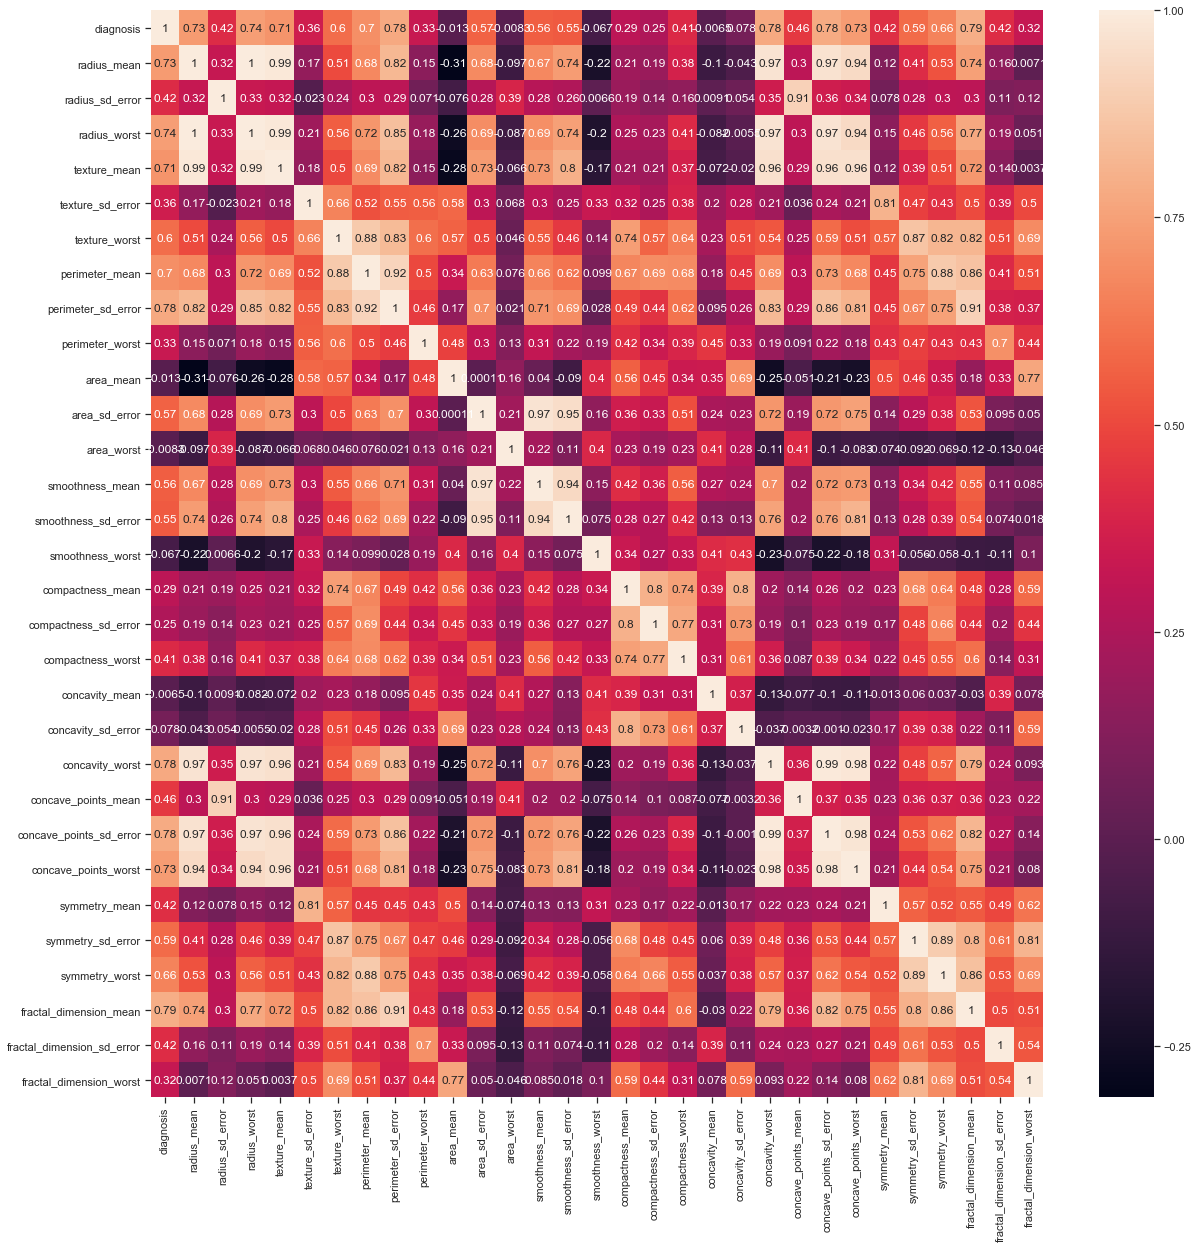

In [503]:
# Make a heatmap on the correlations between variables in the housing data:
data_correlations = data.corr();
sns.heatmap(data_correlations, annot=True);


In [6]:
positive_corr_filter  = data_correlations['diagnosis']>= 0.7
negative_corr_filter = data_correlations['diagnosis']<= 0.00

NameError: name 'data_correlations' is not defined

In [7]:
hight_positive_corr = data_correlations[positive_corr_filter]
hight_negativee_corr = data_correlations[negative_corr_filter]

NameError: name 'data_correlations' is not defined

In [506]:
hight_positive_corr[['diagnosis']]

,diagnosis
diagnosis,1.000000
radius_mean,0.730029
radius_worst,0.742636
texture_mean,0.708984
perimeter_sd_error,0.776614
concavity_worst,0.776454
concave_points_sd_error,0.782914
concave_points_worst,0.733825
fractal_dimension_mean,0.793566


In [5]:
hight_negativee_corr[['diagnosis']] 

NameError: name 'hight_negativee_corr' is not defined

In [508]:
data_correlations

,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
radius_sd_error,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
radius_worst,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
texture_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
texture_sd_error,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
texture_worst,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
perimeter_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
perimeter_sd_error,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
perimeter_worst,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


##### - Feature Importance


Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

In [509]:
# sense we are going to use machine learning we need to split the data into data = x and target = y 

In [510]:
y = data['diagnosis']

In [511]:
data = data.drop(columns=['diagnosis'])

In [512]:
X = data

[0.0050409  0.04894324 0.01785137 0.07721723 0.05155093 0.01386228
 0.01572509 0.06400884 0.07508024 0.0078978  0.00520891 0.01660096
 0.00622144 0.02614786 0.02283239 0.00589932 0.01055264 0.01108311
 0.01856572 0.00581125 0.00519627 0.07751901 0.02364217 0.09781193
 0.08104326 0.0187381  0.03478155 0.04370045 0.08597825 0.01353224
 0.01195523]


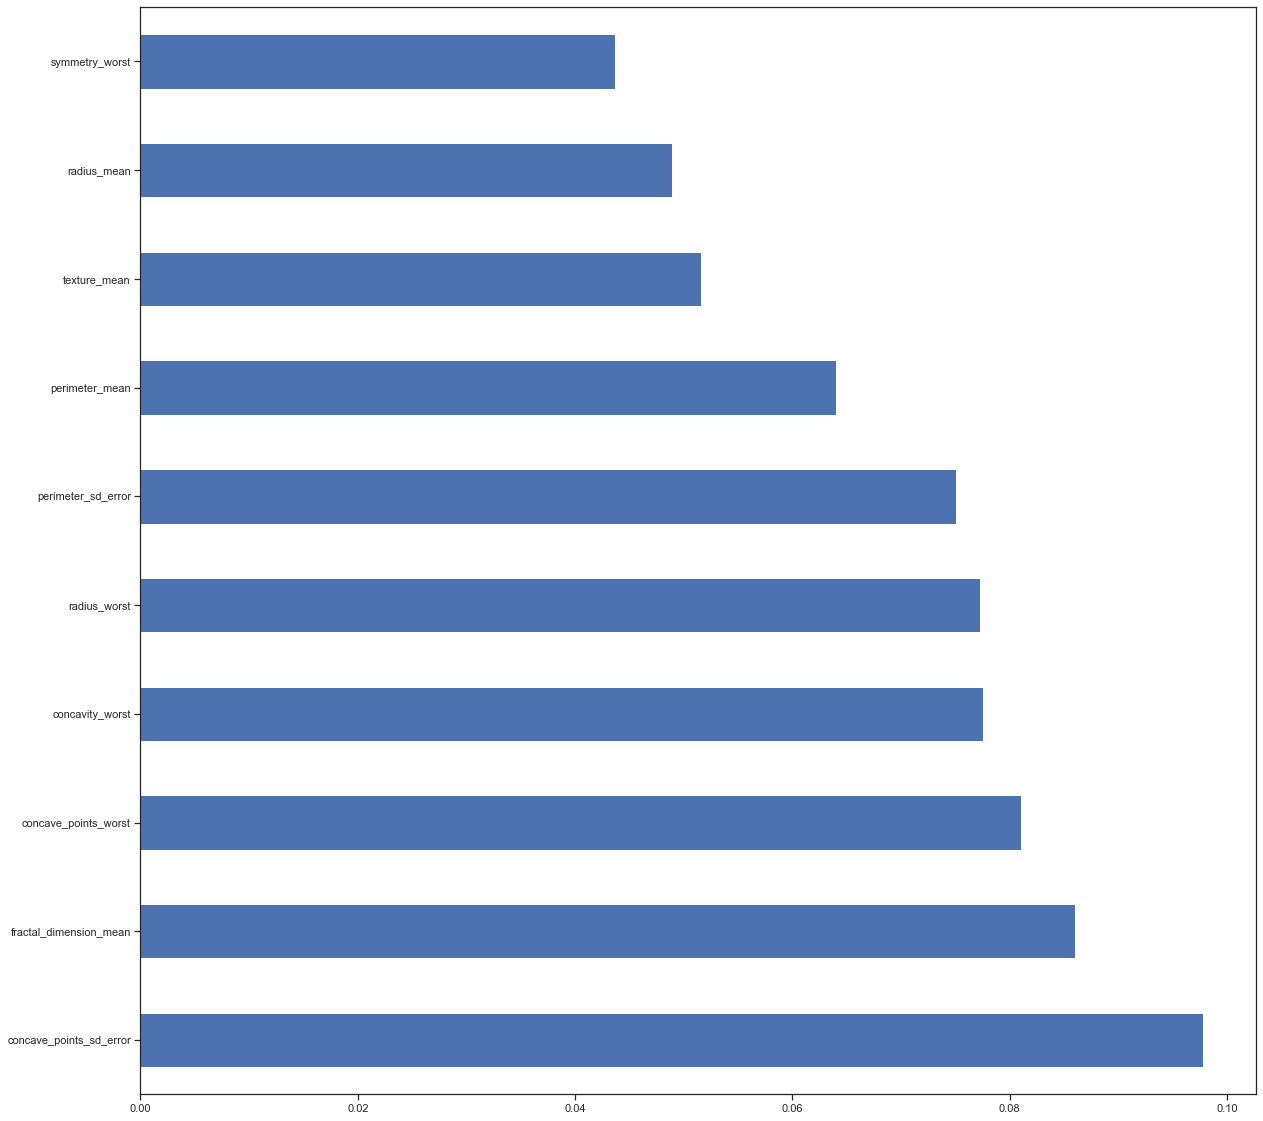

In [513]:
from sklearn.ensemble import ExtraTreesClassifier ,RandomForestClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [514]:
# Plot the scaterd on the feater i select 

In [515]:
g = sns.PairGrid(data, hue="diagnosis")
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x11a9270d0> (for post_execute):


KeyboardInterrupt: 

In [516]:
model_Data = X[['concavity_worst', 'fractal_dimension_mean', 'concave_points_sd_error','perimeter_sd_error','symmetry_worst','radius_worst','concave_points_worst','texture_mean','perimeter_mean','radius_mean']]

### Modeling

In [517]:
import pandas as pd 
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn import svm, tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.preprocessing import StandardScaler  

#### Split the data

Before start the modling prosess we need to split our data first into Training and Testing

In [518]:
X_train, X_test, y_train, y_test = train_test_split(
    model_Data, y, random_state=1)

In [519]:
X_train.shape

(426, 10)

In [520]:
y_train.shape

(426,)

In [521]:
# Perform a stadrsation for the data.
scaler = StandardScaler()   
scaler.fit(X_train)
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

#### - Logistic Regression



Logistic regression is the appropriate regression analysis to conduct when the dependent variable is dichotomous(binary), It uses logistic function, also called the sigmoid function and it developed to describe properties of population growth in ecology, rising quickly and maxing out at the carrying capacity of the environment. It’s an S-shaped curve that can take any real-valued number and map it into a value between 0 and 1.
The coefficients (Beta values b) of the logistic regression algorithm estimated from the training data and The best would result in a model that would predict a value very close to 1 (e.g. m) for the default class and a value very close to 0 (e.g. b) for the other class.

In [522]:
c1 = LogisticRegression()

In [523]:
# Build Lasso regression model 
lasso = Lasso(alpha=.2)
lasso.fit(X_train, y_train)

Lasso(alpha=0.2, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [524]:
lasso.score(X_test, y_test)

0.4452322838758416

#### - KNN

K-nearest neighbors is a classification algorithm, which is a subset of supervised learning assumes that similar things exist in close proximity.The “K” in KNN algorithm is the nearest neighbor we wish to take the vote from and the coise of this parameter very crucial in this algorithm So choosing the best value will improve the model performanse, in choosing Kwe nead to be Careful S it has to be large enough to avoid overfitting, but small enough to avoid oversimplifying the distribution.

And in the code below one of the ways that helps in choosing the best k by Calculating the error.



In [525]:
error = []
# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

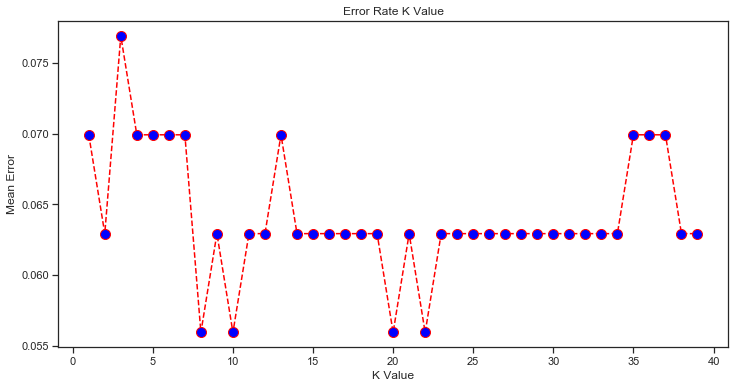

In [526]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  
plt.show()

In [527]:
# from the gragh above we can see that 10 is one of the best values
c2 = KNeighborsClassifier(n_neighbors=10)  

##### - Comparison

In [528]:
classifiers_list =[] #Initialising emty list

In [529]:
# add the Classifiers into it
classifiers_list.append(c2)
classifiers_list.append(c1)


In [530]:
for c in classifiers_list:
    c.fit(X_train, y_train)
    y_pred= c.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print("Accuracy of %s is %s"%(c, acc))
    cm = confusion_matrix(y_test, y_pred)

Accuracy of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=10, p=2,
                     weights='uniform') is 0.9440559440559441
Accuracy of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is 0.951048951048951


Both of the used classication algorithms is effective but the problem with Knn is that it is a lazy learner, it means that it does not learn anything from the training data and simply uses the training data itself for classification causing leak in performance and predictions using a large set of data.

## Part 2: Feedback

- Student 1

In [ ]:
#!/usr/bin/env python

import pandas as pd
import numpy as np
from sklearn import LinearRegression
from sklearn.cross_validation import cross_val_score

# Load data
d = pd.read_csv('../data/train.csv')


# Setup data for prediction
x1 = data.SalaryNormalized
x2 = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()

# Evaluate model
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
scores = cross_val_score(model, x2, x1, cv=1, scoring='mean_absolute_error')
print(scores.mean())

In [ ]:
#!/usr/bin/env python

import pandas as pd
import numpy as np
from sklearn import LinearRegression # ******** you need to cal the library of linear_model
from sklearn.cross_validation import cross_val_score

# Load data
d = pd.read_csv('../data/train.csv')

#********* The naming of the variables need to be Improved try to name it
# somthing relevant So that if you read the code after long time you be able
# from under stand it


# Setup data for prediction
# in Machine learning wen prebaring your  try to name yor target data as y and the data with X
# X = pd.get_dummies(data.ContractType)
# y = data.SalaryNormalized 
# you need to use the data that you read it above ^
x1 = data.SalaryNormalized 
x2 = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()

# Evaluate model

# ********** no need for write it again
from sklearn.cross_validation import cross_val_score 
#  *********you can call multiple functions from one import like : from sklearn.cross_validation import train_test_split,cross_val_score
from sklearn.cross_validation import train_test_split 

# **********in order for making the most from cv you need to increase the cv to more than 1
scores = cross_val_score(model, x2, x1, cv=1, scoring='mean_absolute_error')
print(scores.mean()) 

Over all you've done a great job 👍🏼. 

cross_val_score() reports scores in ascending order (largest score is best). But MAE is naturally descending scores (the smallest score is best). Thus we need to use ‘neg_mean_absolute_error’ to invert the sorting. 
- scores = cross_val_score(model, x2, x1, cv=1, scoring='neg_mean_absolute_error')



I leve a stars comments in the code check it out Please 
and In order to get a good predection you have to choose the right model for you problem.
To semlfiy this you can explore your data and know what to do if your dealing with a problem that requires categories like (meal or feamale) That's mean your dealing with classification so choose one of the classifcation algorithms.
if you not and dealing with Numerics like prices the you are loking for regression.

Fundamentally, classification is about predicting a label and regression is about predicting a quantity


keep up the good work🙏🏼

- Student 2 

In [ ]:
#!/usr/bin/env python

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score

# Load data
data = pd.read_csv('../data/train.csv')


# Setup data for prediction
y = data.SalaryNormalized
X = pd.get_dummies(data.ContractType)

# Setup model
model = LinearRegression()

# Evaluate model
scores = cross_val_score(model, X, y, cv=5, scoring='mean_absolute_error')
print(scores.mean())

👏 Good job 

- cross_val_score() reports scores in ascending order (largest score is best). But MAE is naturally descending scores (the smallest score is best). Thus we need to use ‘neg_mean_absolute_error’ to invert the sorting.
- scores = cross_val_score(model, x2, x1, cv=1, scoring='neg_mean_absolute_error')
- and also you can increse the number of feature in order to increase the performanse of your model

keep doing the great work 👍🏼👍🏼